Saving bank-full.csv to bank-full (1).csv
Shape of data: (45211, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   4521

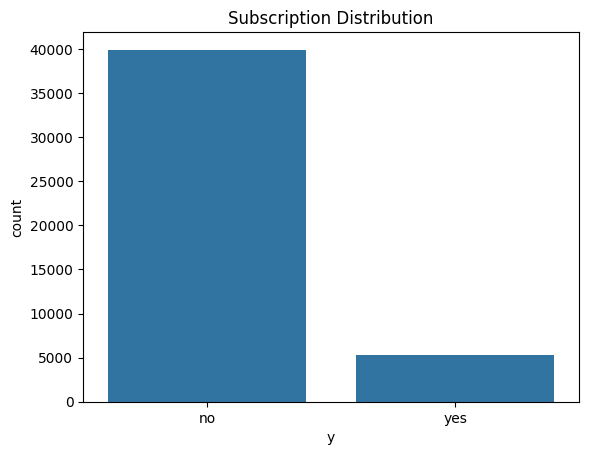

✅ Accuracy Score: 0.8973791883224593

📊 Confusion Matrix:
 [[7753  199]
 [ 729  362]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



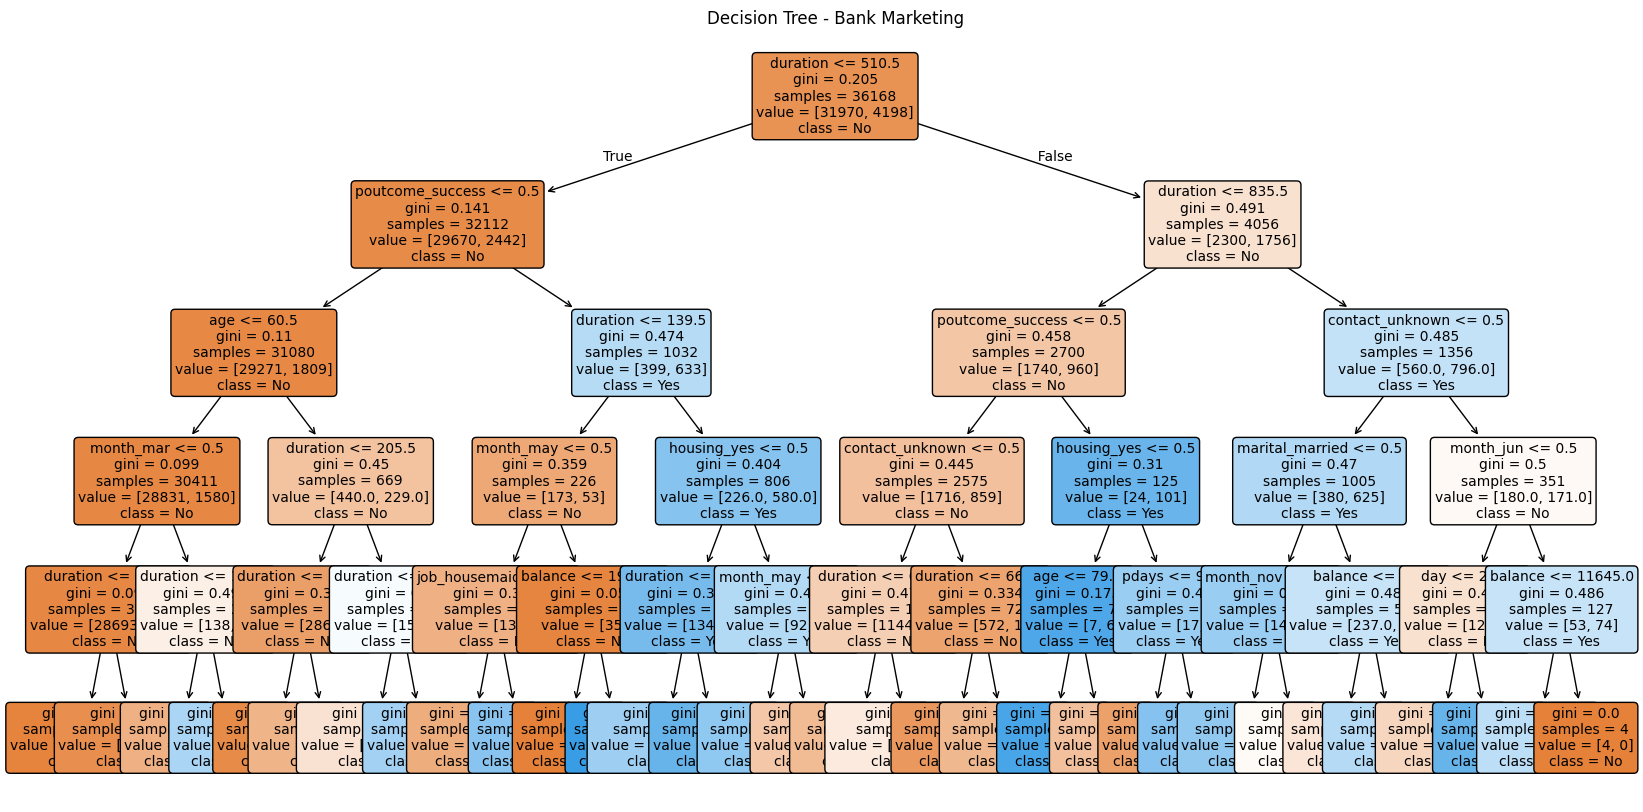

In [5]:
# Task 3 – Decision Tree Classifier: Bank Marketing Dataset
# Author: RagaVarshini BS

# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import files
uploaded = files.upload()

# 📥 Load the Dataset
df = pd.read_csv("bank-full.csv", sep=';')  # Make sure the dataset is in the same folder
df.head()

# 🧼 Data Exploration
print("Shape of data:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe()
df['y'].value_counts()

# 🔍 Visualize Target Distribution
sns.countplot(data=df, x='y')
plt.title("Subscription Distribution")
plt.show()

# 🧹 Data Preprocessing

# Convert target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# 🔀 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 🔎 Evaluate Model
y_pred = clf.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))

# 🌳 Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"], rounded=True, fontsize=10)
plt.title("Decision Tree - Bank Marketing")
plt.show()